# linear SVM（lib linear）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
import time

In [18]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [19]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

3.6661624908447266 [ms]


0.98245614035087714

In [20]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

1984.2379093170166 [ms]


0.97368421052631582

In [21]:
from sklearn.model_selection import GridSearchCV

param = {'C':10 ** np.arange(-15.0, 21.0)}

gs = GridSearchCV(clf, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1e+20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

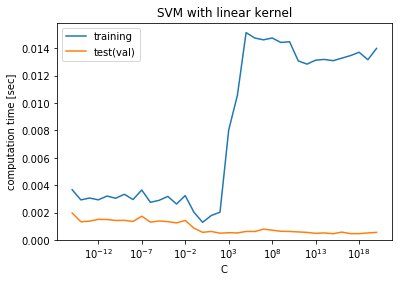

In [22]:
plt.plot(gs.cv_results_['param_C'].data,
        gs.cv_results_['mean_fit_time'],
        label="training")

plt.plot(gs.cv_results_['param_C'].data,
        gs.cv_results_['mean_score_time'],
        label="test(val)")

plt.ylim(0, )
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best")
plt.title("SVM with linear kernel")

In [26]:
from sklearn.svm import LinearSVC # linearカーネルを使う場合はこちらの方がはやい

clf = LinearSVC()

In [27]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)

print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

4.391193389892578 [ms]


0.98245614035087714

In [28]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)

print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

9.933948516845703 [ms]


0.99122807017543857

In [29]:
from sklearn.model_selection import GridSearchCV

param = {'C':10 ** np.arange(-15.0, 21.0)}

gs = GridSearchCV(clf, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1e+20, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

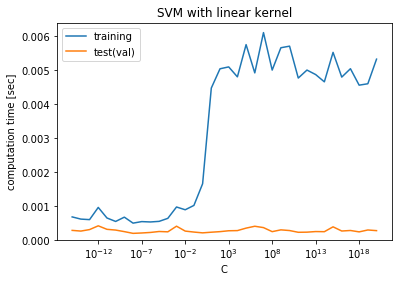

In [30]:
plt.plot(gs.cv_results_['param_C'].data,
        gs.cv_results_['mean_fit_time'],
        label="training")

plt.plot(gs.cv_results_['param_C'].data,
        gs.cv_results_['mean_score_time'],
        label="test(val)")

plt.ylim(0, )
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best")
plt.title("SVM with linear kernel")

In [31]:
# 省略

# linear SVM（lib linear）：primalソルバ

In [32]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [33]:
X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]

In [35]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [36]:
clf = SVC(kernel='linear')

In [38]:
st = time.time()
clf.fit(X_train[::100], y_train[::100]) # 60000個のうち100個置きにとる（600個）
print(1000 * (time.time() - st), "[ms]")

186.6610050201416 [ms]


In [40]:
# 間引きの感覚を変える

for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() -st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, y_train[::thin].size, score))

0.18 sec, size 600, accuracy 0.89
0.48 sec, size 1200, accuracy 0.9
5.67 sec, size 6000, accuracy 0.905
17.63 sec, size 12000, accuracy 0.917
25.49 sec, size 15000, accuracy 0.9164


In [43]:
clf = LinearSVC() # dual

In [44]:
# 間引きの感覚を変える

for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() -st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, y_train[::thin].size, score))

0.14 sec, size 600, accuracy 0.91
0.47 sec, size 1200, accuracy 0.865
3.22 sec, size 6000, accuracy 0.867
9.08 sec, size 12000, accuracy 0.8935
13.23 sec, size 15000, accuracy 0.8952


In [46]:
clf = LinearSVC(dual=False) # primal

In [47]:
# 間引きの感覚を変える

for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() -st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, y_train[::thin].size, score))

0.17 sec, size 600, accuracy 0.91
0.30 sec, size 1200, accuracy 0.87
1.48 sec, size 6000, accuracy 0.865
3.89 sec, size 12000, accuracy 0.894
5.30 sec, size 15000, accuracy 0.8956


# linear SVM（lib linear）：グリッドサーチ

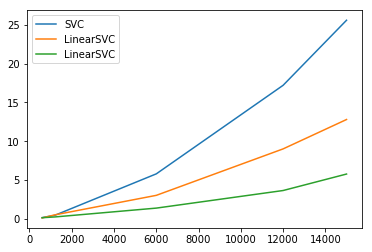

In [50]:
for clf in [SVC(kernel='linear'), LinearSVC(), LinearSVC(dual=False)]:
    times = []
    sizes = []
    for thin in [100, 50, 10, 5, 4]:
        st = time.time()
        clf.fit(X_train[::thin], y_train[::thin])
        times.append(time.time() - st)
        sizes.append(y_train[::thin].size)
    plt.plot(sizes, times, label=clf.__class__.__name__)
    
plt.legend(loc="best")
plt.show()

In [51]:
from sklearn.pipeline import Pipeline

In [54]:
# GridSearch
estimators = [('scaler', MinMaxScaler()),
             ('clf', LinearSVC(dual=False))]

pipe = Pipeline(estimators)

param = {'clf__C':10 ** np.arange(-5.0, 10.0)}

gs = GridSearchCV(pipe, param, n_jobs=1, verbose=2)
# gs.fit(X_train, y_train) # about 30min... おおきなデータにいきなりグリッドサーチはできない

# 確率勾配法（SGD）
データ数が多いときに有利になる

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
import time

In [57]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]


In [59]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [60]:
from sklearn.linear_model import SGDClassifier

In [62]:
clf = SGDClassifier(loss="log") # Logistic regressionに相当する

In [63]:
for thin in [100, 50, 10, 5, 4, 3, 2, 1]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, y_train[::thin].size, score))

0.08 sec, size 600, accuracy 0.86
0.16 sec, size 1200, accuracy 0.87
0.69 sec, size 6000, accuracy 0.859
1.55 sec, size 12000, accuracy 0.877
1.88 sec, size 15000, accuracy 0.8792
2.47 sec, size 20000, accuracy 0.8764247150569886
3.80 sec, size 30000, accuracy 0.8818
7.34 sec, size 60000, accuracy 0.8956


In [64]:
clf = SGDClassifier(loss="hinge") # linear SVMに相当する

In [65]:
for thin in [100, 50, 10, 5, 4, 3, 2, 1]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, y_train[::thin].size, score))

0.05 sec, size 600, accuracy 0.89
0.08 sec, size 1200, accuracy 0.88
0.34 sec, size 6000, accuracy 0.854
0.67 sec, size 12000, accuracy 0.8795
0.96 sec, size 15000, accuracy 0.8764
1.27 sec, size 20000, accuracy 0.8764247150569886
1.98 sec, size 30000, accuracy 0.8822
3.64 sec, size 60000, accuracy 0.8968


In [66]:
# 省略

# 確率勾配法（SGD）：数式の説明

In [67]:
# サンプル数が少ないときは普通にやればよい。多くなってきたら確率勾配法

# 確率勾配法（SGD）：グリッドサーチ

In [70]:
# 省略

# 確率勾配法（SGD）：スモールデータの認識

In [71]:
# 確率勾配法をスモールデータに適用するとどうなるか？

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
clf = SGDClassifier(loss = "hinge") # SVM

In [102]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96491228070175439

In [103]:
scores = []

for _ in range(50):
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

In [107]:
sum(scores) / len(scores)

0.92859649122806975

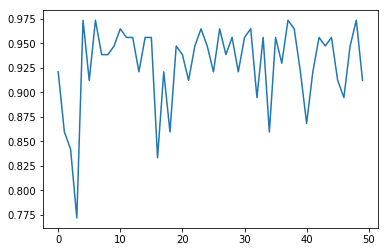

In [108]:
plt.plot(scores)